In [1]:
# -*- coding: utf-8 -*-

# Built-in modules
import logging
import os

# 3rd party modules
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Local modules
#import utils as ut
#import numpy as np

# Useful directories
RESULT_DIR = os.path.join('results')
TRAIN_MUSEUM_DIR = os.path.join('dataset', 'museum_set_random')
TRAIN_QUERY_DIR = os.path.join('dataset', 'query_devel_random')


# Pickle filename with the training data
PICKLE_MUSEUM_DATASET = 'train_museum.pkl'
PICKLE_QUERY_DATASET = 'train_query.pkl'


import cv2 as cv

img1 = cv.imread('../dataset/query_devel_W4/ima_000015.jpg',0)          # queryImage
#img2 = cv.imread('../dataset/BBDD_W4/ima_000035.jpg',0) # trainImage
#img2 = cv.imread('../dataset/BBDD_W4/ima_000048.jpg',0) # trainImage
img2 = cv.imread('../dataset/BBDD_W4/ima_000084.jpg',0) # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)


# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:20], outImg=None, flags=2)
plt.figure(figsize=(15,15))
cv.imwrite('orb_15_84_good_multiple.png', img3)
plt.imshow(img3),plt.show()
'''
def match_kpt(des1, des2, n_matches, thresh):
    
    # create BFMatcher object
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    # Match descriptors.
    matches = bf.match(des1,des2)
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)

    dist = []
    for m in matches[:n_matches]:
        dist.append(m.distance)

    sqrt_sum = np.sum(np.array(dist)**2) / n_matches
    
    return sqrt_sum <= thresh
    
result = match_kpt(des1, des2, 10, 500)

print(result)
'''

<Figure size 1500x1500 with 1 Axes>

'\ndef match_kpt(des1, des2, n_matches, thresh):\n    \n    # create BFMatcher object\n    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)\n    # Match descriptors.\n    matches = bf.match(des1,des2)\n    # Sort them in the order of their distance.\n    matches = sorted(matches, key = lambda x:x.distance)\n\n    dist = []\n    for m in matches[:n_matches]:\n        dist.append(m.distance)\n\n    sqrt_sum = np.sum(np.array(dist)**2) / n_matches\n    \n    return sqrt_sum <= thresh\n    \nresult = match_kpt(des1, des2, 10, 500)\n\nprint(result)\n'

In [ ]:
dist = []
for m in matches[:10]:
    dist.append(m.distance)

sqrt_sum = np.sum(np.array(dist)**2)/10

print(sqrt_sum)

In [29]:
import utils as ut

gt = [[0, [-1]], [1, [-1]], [2, [115]], [3, [-1]], [4, [-1]], [5, [99]], [6, [-1]], [7, [89]], [8, [19]], 
      [9, [85]], [10, [90]], [11, [121, 117]], [12, [-1]], [13, [-1]], [14, [130]], [15, [6, 84]], 
      [16, [35, 48, 52]], [17, [118]], [18, [-1]], [19, [-1]], [20, [-1]], [21, [-1]], [22, [60]], 
      [23, [119, 128]], [24, [-1]], [25, [47]], [26, [-1]], [27, [41]], [28, [-1]], [29, [126, 123]]]

dbn = '../dataset/BBDD_W4/'
qn = '../dataset/query_devel_W4/'

dict_db = ut.get_files_from_dir(dbn)
dict_q = ut.get_files_from_dir(qn)

dict_db = np.sort(dict_db)
dict_q = np.sort(dict_q)

#print(dict_q)
for v in gt:
    if v[1] != [-1]:
        
        for v_db in v[1]:

            #print(dict_q[v[0]])
            q_name = os.path.join(qn, dict_q[v[0]])
            db_name = os.path.join(dbn,dict_db[v_db])
            
            q = cv.imread(q_name)
            db = cv.imread(db_name)
            
            #plt.imshow(q)
            #plt.imshow(db)
            #plt.show()
            '''
            fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
            ax = axs[0]
            ax.imshow(q)
            ax = axs[1]
            ax.imshow(db)
            '''
            orb = cv.ORB_create()

            # find the keypoints and descriptors with ORB
            kp1, des1 = orb.detectAndCompute(q,None)
            kp2, des2 = orb.detectAndCompute(db,None)


            # create BFMatcher object
            bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
            # Match descriptors.
            matches = bf.match(des1,des2)
            # Sort them in the order of their distance.
            matches = sorted(matches, key = lambda x:x.distance)

            n_matches = 10

            dist = []
            for m in matches[:n_matches]:
                dist.append(m.distance)

            sqrt_sum = np.sum(np.array(dist)**2) / n_matches
            
            #if sqrt_sum > 1000:
            print(q_name, db_name)
            print(sqrt_sum)



2018-11-02 12:24:21,980 - utils - DEBUG - Getting files in '/home/agus/repos/Team5/image_retrieval/dataset/BBDD_W4'
2018-11-02 12:24:21,984 - utils - DEBUG - Retrieving 131 files from '/home/agus/repos/Team5/image_retrieval/dataset/BBDD_W4'
2018-11-02 12:24:21,985 - utils - DEBUG - Getting files in '/home/agus/repos/Team5/image_retrieval/dataset/query_devel_W4'
2018-11-02 12:24:21,987 - utils - DEBUG - Retrieving 30 files from '/home/agus/repos/Team5/image_retrieval/dataset/query_devel_W4'


../dataset/query_devel_W4/ima_000002.jpg ../dataset/BBDD_W4/ima_000115.jpg
186.2
../dataset/query_devel_W4/ima_000005.jpg ../dataset/BBDD_W4/ima_000099.jpg
7.5
../dataset/query_devel_W4/ima_000007.jpg ../dataset/BBDD_W4/ima_000089.jpg
697.3
../dataset/query_devel_W4/ima_000008.jpg ../dataset/BBDD_W4/ima_000019.jpg
38.3
../dataset/query_devel_W4/ima_000009.jpg ../dataset/BBDD_W4/ima_000085.jpg
251.6
../dataset/query_devel_W4/ima_000010.jpg ../dataset/BBDD_W4/ima_000090.jpg
156.4
../dataset/query_devel_W4/ima_000011.jpg ../dataset/BBDD_W4/ima_000121.jpg
432.6
../dataset/query_devel_W4/ima_000011.jpg ../dataset/BBDD_W4/ima_000117.jpg
409.4
../dataset/query_devel_W4/ima_000014.jpg ../dataset/BBDD_W4/ima_000130.jpg
276.8
../dataset/query_devel_W4/ima_000015.jpg ../dataset/BBDD_W4/ima_000006.jpg
34.1
../dataset/query_devel_W4/ima_000015.jpg ../dataset/BBDD_W4/ima_000084.jpg
3.8
../dataset/query_devel_W4/ima_000016.jpg ../dataset/BBDD_W4/ima_000035.jpg
16.2
../dataset/query_devel_W4/ima_00001

# RSIFT

In [31]:


img1 = cv.imread('../dataset/query_devel_W4/ima_000029.jpg')          # queryImage
img2 = cv.imread('../dataset/BBDD_W4/ima_000123.jpg') # trainImage

def compute_rsift(image, eps=1e-7):
    
    '''Input = OpenCv color Image
       Output = True if images match, False otherwise'''
    
    # Convert to gray scale:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # compute SIFT descriptors
    (kps, descs) = sift.detectAndCompute(image, None)

    # if there are no keypoints or descriptors, return an empty tuple
    if len(kps) == 0:
        return ([], None)

    # apply the Hellinger kernel by first L1-normalizing and taking the
    # square-root
    descs /= (descs.sum(axis=1, keepdims=True) + eps)
    descs = np.sqrt(descs)
    #descs /= (np.linalg.norm(descs, axis=1, ord=2) + eps)

    # return a tuple of the keypoints and descriptors
    return (kps, descs)

def match_kpt_rsift(des1, des2, n_matches, thresh):
    
    ''' Input = Images descriptors
    Output = True if images match, False otherwise'''
    
    # create BFMatcher object
    bf = cv.BFMatcher(cv2.NORM_L2, crossCheck=True)
    # Match descriptors.
    matches = bf.match(des1,des2)
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)

    dist = []
    for m in matches[:n_matches]:
        dist.append(m.distance)

    sqrt_sum = np.sum(np.array(dist)**2) / n_matches
    
    return sqrt_sum <= thresh

(kp1, des1) = compute_rsift(img1)
(kp2, des2) = compute_rsift(img2)

result = match_kpt_rsift(des1, des2, 20, 0.02)

  

True


"\n# create BFMatcher object\nbf = cv.BFMatcher(cv2.NORM_L2, crossCheck=True)\n# Match descriptors.\nmatches = bf.match(des1,des2)\n# Sort them in the order of their distance.\nmatches = sorted(matches, key = lambda x:x.distance)\n# Draw first 10 matches.\nimg3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:40], outImg=None, flags=2)\n\n#cv.imwrite('sift_25_47_fail.png', img3)\n\nplt.figure(figsize=(15,15))\nplt.imshow(img3),plt.show()\n"

In [33]:
import utils as ut

gt = [[0, [-1]], [1, [-1]], [2, [115]], [3, [-1]], [4, [-1]], [5, [99]], [6, [-1]], [7, [89]], [8, [19]], [9, [85]], [10, [90]], [11, [121, 117]], [12, [-1]], [13, [-1]], [14, [130]], [15, [6, 84]], [16, [35, 48, 52]], [17, [118]], [18, [-1]], [19, [-1]], [20, [-1]], [21, [-1]], [22, [60]], [23, [119, 128]], [24, [-1]], [25, [47]], [26, [-1]], [27, [41]], [28, [-1]], [29, [126, 123]]]

dbn = '../dataset/BBDD_W4/'
qn = '../dataset/query_devel_W4/'

dict_db = ut.get_files_from_dir(dbn)
dict_q = ut.get_files_from_dir(qn)

dict_db = np.sort(dict_db)
dict_q = np.sort(dict_q)

for v in gt:
    if v[1] != [-1]:
        
        for v_db in v[1]:

            q_name = os.path.join(qn, dict_q[v[0]+1])
            db_name = os.path.join(dbn,dict_db[v_db])
            
            print(q_name, db_name)
            
            q = cv.imread(q_name)
            db = cv.imread(db_name)
            
            kp1, des1 = compute_rsift(q)
            kp2, des2 = compute_rsift(db)
            
            # BFMatcher with default params
            bf = cv.BFMatcher()
            print(match_kpt(des1, des2, 20, 0.02))
           

            

2018-11-12 11:21:55,670 - utils - DEBUG - Getting files in '/home/agus/repos/Team5/image_retrieval/dataset/BBDD_W4'
2018-11-12 11:21:55,674 - utils - DEBUG - Retrieving 131 files from '/home/agus/repos/Team5/image_retrieval/dataset/BBDD_W4'
2018-11-12 11:21:55,675 - utils - DEBUG - Getting files in '/home/agus/repos/Team5/image_retrieval/dataset/query_devel_W4'
2018-11-12 11:21:55,677 - utils - DEBUG - Retrieving 30 files from '/home/agus/repos/Team5/image_retrieval/dataset/query_devel_W4'


../dataset/query_devel_W4/ima_000003.jpg ../dataset/BBDD_W4/ima_000115.jpg
False
../dataset/query_devel_W4/ima_000006.jpg ../dataset/BBDD_W4/ima_000099.jpg
False
../dataset/query_devel_W4/ima_000008.jpg ../dataset/BBDD_W4/ima_000089.jpg
False
../dataset/query_devel_W4/ima_000009.jpg ../dataset/BBDD_W4/ima_000019.jpg
False
../dataset/query_devel_W4/ima_000010.jpg ../dataset/BBDD_W4/ima_000085.jpg
False
../dataset/query_devel_W4/ima_000011.jpg ../dataset/BBDD_W4/ima_000090.jpg
False
../dataset/query_devel_W4/ima_000012.jpg ../dataset/BBDD_W4/ima_000121.jpg
False
../dataset/query_devel_W4/ima_000012.jpg ../dataset/BBDD_W4/ima_000117.jpg
False
../dataset/query_devel_W4/ima_000015.jpg ../dataset/BBDD_W4/ima_000130.jpg
False
../dataset/query_devel_W4/ima_000016.jpg ../dataset/BBDD_W4/ima_000006.jpg
False
../dataset/query_devel_W4/ima_000016.jpg ../dataset/BBDD_W4/ima_000084.jpg
False
../dataset/query_devel_W4/ima_000017.jpg ../dataset/BBDD_W4/ima_000035.jpg
False
../dataset/query_devel_W4/im

IndexError: index 30 is out of bounds for axis 0 with size 30

# SURF

2018-11-02 12:58:55,254 - matplotlib.axes._base - DEBUG - update_title_pos


(2075, 2)


2018-11-02 12:58:55,578 - matplotlib.axes._base - DEBUG - update_title_pos
2018-11-02 12:58:55,612 - matplotlib.axes._base - DEBUG - update_title_pos
2018-11-02 12:58:55,634 - matplotlib.axes._base - DEBUG - update_title_pos


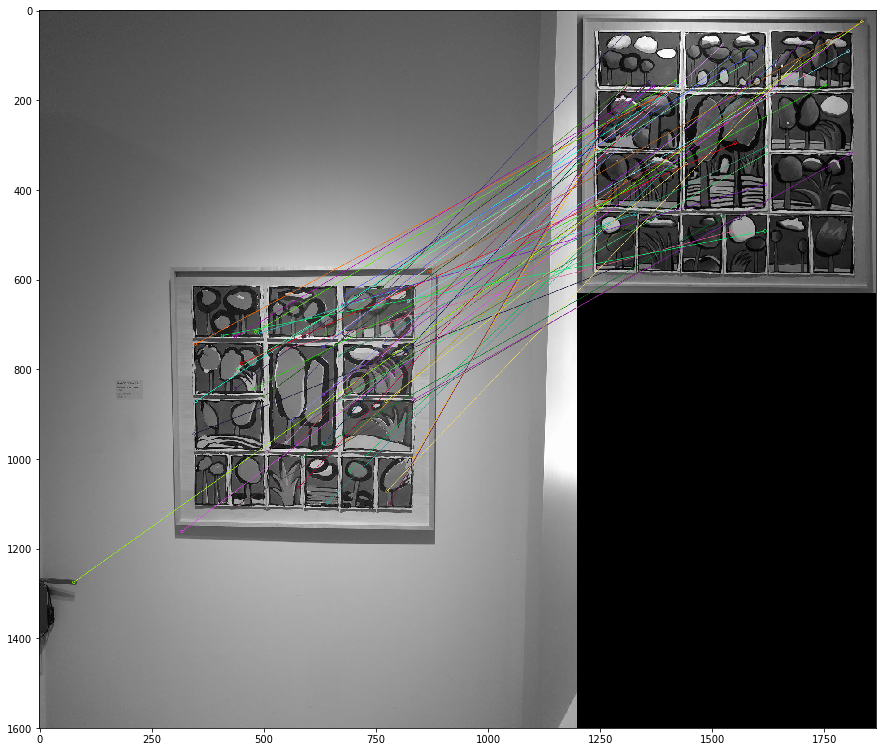

(<matplotlib.image.AxesImage at 0x7f1108efb438>, None)

In [75]:


img1 = cv.imread('../dataset/query_devel_W4/ima_000025.jpg',0)          # queryImage
#img2 = cv.imread('../dataset/BBDD_W4/ima_000035.jpg',0) # trainImage
#img2 = cv.imread('../dataset/BBDD_W4/ima_000048.jpg',0) # trainImage
img2 = cv.imread('../dataset/BBDD_W4/ima_000047.jpg',0) # trainImage

# Initiate SIFT detector
surf = cv.xfeatures2d.SURF_create(1000)

# find the keypoints and descriptors with SIFT
kp1, des1 = surf.detectAndCompute(img1,None)
kp2, des2 = surf.detectAndCompute(img2,None)


# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
#img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,mdist,None,flags=2)

#cv.imwrite('surf_5_99_good.png', img3)
#cv.imwrite('surf_7_89_fail.png', img3)
#cv.imwrite('surf_8_19_good.png', img3)
#cv.imwrite('surf_15_6_good_mult.png', img3)
#cv.imwrite('surf_15_84_good_mult.png', img3)
#cv.imwrite('surf_17_118_fail.png', img3)
cv.imwrite('surf_25_47_fail.png', img3)

print(np.shape(matches))
plt.figure(figsize=(15,15))
plt.imshow(img3),plt.show()
  

In [ ]:
########
# SURF:
########

#img1 = cv.imread('../dataset/query_devel_W4/ima_000005.jpg',0)          # queryImage
#img2 = cv.imread('../dataset/BBDD_W4/ima_000099.jpg',0)                 # trainImage

# Initiate SIFT detector
#surf = cv.xfeatures2d.SURF_create(5000)

# find the keypoints and descriptors with SURF
#kp1, des1 = surf.detectAndCompute(img1,None)
#kp2, des2 = surf.detectAndCompute(img2,None)

def compute_surf_descriptor(des1, des2, metric, thresh):

    # Result: compute_sift_descriptor(des1, des2, 0.5, 5)
    # Metric < 0.5, Threshold NOT SO GOOD! The ratio algorith may not be the best... 

    # BFMatcher with default params
    bf = cv.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)

    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < metric*n.distance:
            good.append([m])
            
    return(len(good)>=thresh)

    